## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Read the Dataset

In [2]:
df = pd.read_csv(r'D:\7.30 PM DATA SCIENCE AND AI\DAILY SESSION MATERIALS\OCT\9th, 10th\project\adult.csv')

## 3. Exploratory Data Analysis

In [3]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 1. Rename column names

In [6]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.head()

age workclass  fnlwgt     education  education_num marital_status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital_gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital_loss  hours_per_week native_country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Explore categorical variables

In [10]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [11]:
df[categorical].head()

workclass     education marital_status         occupation   relationship  \
0         ?       HS-grad        Widowed                  ?  Not-in-family   
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
2         ?  Some-college        Widowed                  ?      Unmarried   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   

    race     sex native_country income  
0  White  Female  United-States  <=50K  
1  White  Female  United-States  <=50K  
2  Black  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K

### Missing values in categorical variables

In [12]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

### Frequency counts of categorical variables

In [13]:
for var in categorical:
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

### Frequency distribution of categorical variables

In [15]:
for var in categorical:
    print(df[var].value_counts()/float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


## 1] Explore workclass variable

In [16]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
df['workclass'].replace('?', np.NaN, inplace=True)

In [19]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

## 2] Explore occupation variable

In [20]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [21]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
df['occupation'].replace('?', np.NaN, inplace=True)

In [23]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

## 3] Explore native_country variable

In [24]:
df['native_country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [25]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [26]:
df['native_country'].replace('?', np.NaN, inplace=True)

In [27]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

### Check missing values in categorical variables again

In [28]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

## 4] Explore Numerical Variables:

In [29]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [30]:
df[numerical].head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   90   77053              9             0          4356              40
1   82  132870              9             0          4356              18
2   66  186061             10             0          4356              40
3   54  140359              4             0          3900              40
4   41  264663             10             0          3900              40

In [31]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

## 4. Declare matrix of independent and dependent variable

In [32]:
X = df.drop('income', axis=1)
y = df['income']

## 5. Split the Dataset into Training and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [34]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## 6. Feature Engineering

In [35]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [36]:
categorical = [col for col in X_train.columns if X_train[col].dtypes=='O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [37]:
numerical = [col for col in X_train.columns if X_train[col].dtypes!='O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### 1. Missing values in categorical variables

In [38]:
X_train[categorical].isnull().sum()

workclass         1294
education            0
marital_status       0
occupation        1300
relationship         0
race                 0
sex                  0
native_country     415
dtype: int64

In [39]:
X_train[categorical].isnull().mean()

workclass         0.056774
education         0.000000
marital_status    0.000000
occupation        0.057038
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018208
dtype: float64

In [40]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.056774306774306775
occupation 0.057037557037557036
native_country 0.018208143208143207


### 2. Impute missing categorical variables with most frequent value

In [41]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [42]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [43]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [44]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [45]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### 3. Encode categorical variables

In [46]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [47]:
X_train[categorical].head()

workclass     education      marital_status         occupation  \
32098    State-gov     Bachelors  Married-civ-spouse    Exec-managerial   
25206    Local-gov       HS-grad  Married-civ-spouse  Machine-op-inspct   
23491      Private  Some-college       Never-married    Exec-managerial   
12367    Local-gov       HS-grad       Never-married    Farming-fishing   
7054   Federal-gov       Masters  Married-civ-spouse    Exec-managerial   

        relationship   race     sex native_country  
32098           Wife  White  Female  United-States  
25206        Husband  White    Male  United-States  
23491  Not-in-family  White  Female  United-States  
12367      Own-child  White    Male  United-States  
7054         Husband  White    Male  United-States

In [48]:
import category_encoders as ce

In [50]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [51]:
X_train.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
32098   40            1            0            0            0            0   
25206   39            0            1            0            0            0   
23491   42            0            0            1            0            0   
12367   27            0            1            0            0            0   
7054    38            0            0            0            1            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  \
32098            0            0            0   31627  ...                  0   
25206            0            0            0  236391  ...                  0   
23491            0            0            0  194710  ...                  0   
12367            0            0            0  273929  ...                  0   
7054             0            0            0   99527  ...                  0   

       native_country_33  native_country_34  native_country_35  \
32098                  0                  0                  0   
25206                  0                  0                  0   
23491                  0                  0                  0   
12367                  0                  0                  0   
7054                   0                  0                  0   

       native_country_36  native_country_37  native_country_38  \
32098                  0                  0                  0   
25206                  0                  0                  0   
23491                  0                  0                  0   
12367                  0                  0                  0   
7054                   0                  0                  0   

       native_country_39  native_country_40  native_country_41  
32098                  0                  0                  0  
25206                  0                  0                  0  
23491                  0                  0                  0  
12367                  0                  0                  0  
7054                   0                  0                  0  

[5 rows x 105 columns]

In [53]:
X_train.shape

(22792, 105)

In [54]:
X_test.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
22278   56            0            0            1            0            0   
8950    19            0            0            1            0            0   
7838    23            0            0            1            0            0   
16505   37            0            0            0            1            0   
19140   49            0            0            1            0            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  \
22278            0            0            0  274475  ...                  0   
8950             0            0            0  237455  ...                  0   
7838             0            0            0  125491  ...                  0   
16505            0            0            0   48779  ...                  0   
19140            0            0            0  423222  ...                  0   

       native_country_33  native_country_34  native_country_35  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_36  native_country_37  native_country_38  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_39  native_country_40  native_country_41  
22278                  0                  0                  0  
8950                   0                  0                  0  
7838                   0                  0                  0  
16505                  0                  0                  0  
19140                  0                  0                  0  

[5 rows x 105 columns]

In [55]:
X_test.shape

(9769, 105)

## 7. Feature Scaling

In [56]:
cols = X_train.columns

In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [58]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

age workclass_1 workclass_2 workclass_3 workclass_4 workclass_5  \
0      0.15         1.0         0.0        -1.0         0.0         0.0   
1      0.10         0.0         1.0        -1.0         0.0         0.0   
2      0.25         0.0         0.0         0.0         0.0         0.0   
3     -0.50         0.0         1.0        -1.0         0.0         0.0   
4      0.05         0.0         0.0        -1.0         1.0         0.0   
...     ...         ...         ...         ...         ...         ...   
22787  2.65         0.0         0.0        -1.0         0.0         0.0   
22788 -0.05         0.0         0.0         0.0         0.0         0.0   
22789 -0.55         0.0         0.0         0.0         0.0         0.0   
22790  0.35         0.0         0.0         0.0         0.0         0.0   
22791  0.10         0.0         0.0         0.0         0.0         0.0   

      workclass_6 workclass_7 workclass_8    fnlwgt  ... native_country_32  \
0             0.0         0.0         0.0 -1.229248  ...               0.0   
1             0.0         0.0         0.0  0.483176  ...               0.0   
2             0.0         0.0         0.0  0.134601  ...               0.0   
3             0.0         0.0         0.0  0.797103  ...               0.0   
4             0.0         0.0         0.0 -0.661406  ...               0.0   
...           ...         ...         ...       ...  ...               ...   
22787         1.0         0.0         0.0  0.865395  ...               0.0   
22788         0.0         0.0         0.0  0.845541  ...               0.0   
22789         0.0         0.0         0.0 -1.059197  ...               0.0   
22790         0.0         0.0         0.0 -0.529306  ...               0.0   
22791         0.0         0.0         0.0  0.383992  ...               0.0   

      native_country_33 native_country_34 native_country_35 native_country_36  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
22787               0.0               0.0               0.0               0.0   
22788               0.0               0.0               0.0               0.0   
22789               0.0               0.0               0.0               0.0   
22790               0.0               0.0               0.0               0.0   
22791               0.0               0.0               0.0               0.0   

      native_country_37 native_country_38 native_country_39 native_country_40  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
22787               0.0               0.0               0.0               0.0   
22788               0.0               0.0               0.0               0.0   
22789               0.0               0.0               0.0               0.0   
22790               0.0               0.0               0.0               0.0   
22791               0.0               0.0               0.0               0.0   

      native_country_41  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
22787               0.0  
22788           

In [59]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

age workclass_1 workclass_2 workclass_3 workclass_4 workclass_5  \
0     0.95         0.0         0.0         0.0         0.0         0.0   
1    -0.90         0.0         0.0         0.0         0.0         0.0   
2    -0.70         0.0         0.0         0.0         0.0         0.0   
3     0.00         0.0         0.0        -1.0         1.0         0.0   
4     0.60         0.0         0.0         0.0         0.0         0.0   
...    ...         ...         ...         ...         ...         ...   
9764  0.00         0.0         0.0        -1.0         0.0         0.0   
9765 -0.55         0.0         0.0         0.0         0.0         0.0   
9766 -0.60         0.0         0.0         0.0         0.0         0.0   
9767 -0.15         0.0         0.0         0.0         0.0         0.0   
9768  0.65         0.0         0.0         0.0         0.0         0.0   

     workclass_6 workclass_7 workclass_8    fnlwgt  ... native_country_32  \
0            0.0         0.0         0.0  0.801669  ...               0.0   
1            0.0         0.0         0.0  0.492074  ...               0.0   
2            0.0         0.0         0.0 -0.444272  ...               0.0   
3            0.0         0.0         0.0 -1.085808  ...               0.0   
4            0.0         0.0         0.0  2.045628  ...               0.0   
...          ...         ...         ...       ...  ...               ...   
9764         1.0         0.0         0.0 -1.250766  ...               0.0   
9765         0.0         0.0         0.0 -0.108233  ...               0.0   
9766         0.0         0.0         0.0 -0.182036  ...               0.0   
9767         0.0         0.0         0.0 -0.254141  ...               0.0   
9768         0.0         0.0         0.0 -0.704358  ...               0.0   

     native_country_33 native_country_34 native_country_35 native_country_36  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
9764               0.0               0.0               0.0               0.0   
9765               0.0               0.0               0.0               0.0   
9766               0.0               0.0               0.0               0.0   
9767               0.0               0.0               0.0               0.0   
9768               0.0               0.0               0.0               0.0   

     native_country_37 native_country_38 native_country_39 native_country_40  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
9764               0.0               0.0               0.0               0.0   
9765               0.0               0.0               0.0               0.0   
9766               0.0               0.0               0.0               0.0   
9767               0.0               0.0               0.0               0.0   
9768               0.0               0.0               0.0               0.0   

     native_country_41  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
9764               0.0  
9765               0.0  
9766               0.0  
9767               0.

## 8. Implement Naive Bayes Algorithm

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

## 9. Predict the results

In [61]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

## 10. Check Accuracy Score

In [62]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8031


### Check for overfitting and underfitting

In [63]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8009
Test set score: 0.8031


* The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy

In [64]:
y_test.value_counts()

<=50K    7410
>50K     2359
Name: income, dtype: int64

In [67]:
null_accuracy = (7410/(7410+2539))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7448


* So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

## 11. Confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5953 1457]
 [ 467 1892]]

True Positives(TP) =  5953

True Negatives(TN) =  1892

False Positives(FP) =  1457

False Negatives(FN) =  467


### Visualize confusion matrix with seaborn heatmap

<Axes: >

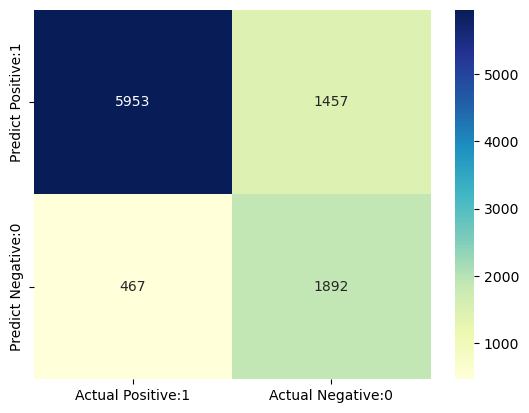

In [69]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 12. Classification metrices

### 1. Classification Report

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7410
        >50K       0.56      0.80      0.66      2359

    accuracy                           0.80      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.80      0.81      9769



### 2. Accuracy

In [72]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [73]:
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Accuracy : {0:0.4f}'.format(accuracy))

Accuracy : 0.8031


### 3. Error

In [74]:
error = (FP + FN) / float(TP + TN + FP + FN)

print('Error : {0:0.4f}'.format(error))

Error : 0.1969


### 4. Precision

In [76]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8034


### 5. Recall

In [77]:
recall = TP / float(TP + FN)

print('Recall : {0:0.4f}'.format(recall))

Recall : 0.9273


### 6. True Positive Rate

In [78]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9273


### 7. False Positive Rate

In [79]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4351


### 8. Specificity

In [80]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5649


## 13. Calculate class probabilities

In [82]:
y_pred_proba = gnb.predict_proba(X_test)[0:10]
y_pred_proba

array([[9.99999693e-01, 3.06618197e-07],
       [1.00000000e+00, 1.02355439e-10],
       [9.99999997e-01, 3.02850706e-09],
       [8.78002299e-04, 9.99121998e-01],
       [7.55021219e-04, 9.99244979e-01],
       [9.99505992e-01, 4.94008099e-04],
       [9.99999697e-01, 3.03376335e-07],
       [9.63760637e-01, 3.62393626e-02],
       [9.99999937e-01, 6.31028512e-08],
       [1.41650243e-03, 9.98583498e-01]])

In [84]:
y_pred_prob_df = pd.DataFrame(data=y_pred_proba, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

Prob of - <=50K  Prob of - >50K
0         1.000000    3.066182e-07
1         1.000000    1.023554e-10
2         1.000000    3.028507e-09
3         0.000878    9.991220e-01
4         0.000755    9.992450e-01
5         0.999506    4.940081e-04
6         1.000000    3.033763e-07
7         0.963761    3.623936e-02
8         1.000000    6.310285e-08
9         0.001417    9.985835e-01

### Print the first 10 predicted probabilities for class 1 - Probability of >50K

In [85]:
gnb.predict_proba(X_test)[0:10, 1]

array([3.06618197e-07, 1.02355439e-10, 3.02850706e-09, 9.99121998e-01,
       9.99244979e-01, 4.94008099e-04, 3.03376335e-07, 3.62393626e-02,
       6.31028512e-08, 9.98583498e-01])

In [86]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

### Plot histogram of predicted probabilities

(0.0, 1.0)

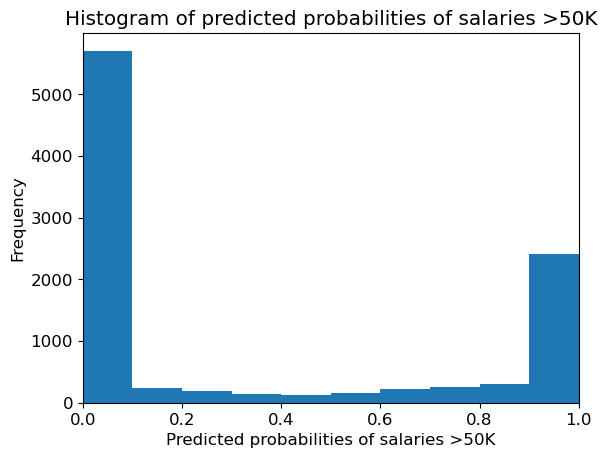

In [87]:
plt.rcParams['font.size'] = 12

plt.hist(y_pred1, bins=10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

plt.xlim(0,1)

### Observations

* We can see that the above histogram is highly positive skewed.
* The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.
* There are relatively small number of observations with probability > 0.5.
* So, these small number of observations predict that the salaries will be >50K.
* Majority of observations predcit that the salaries will be <=50K.

## 14. ROC - AUC

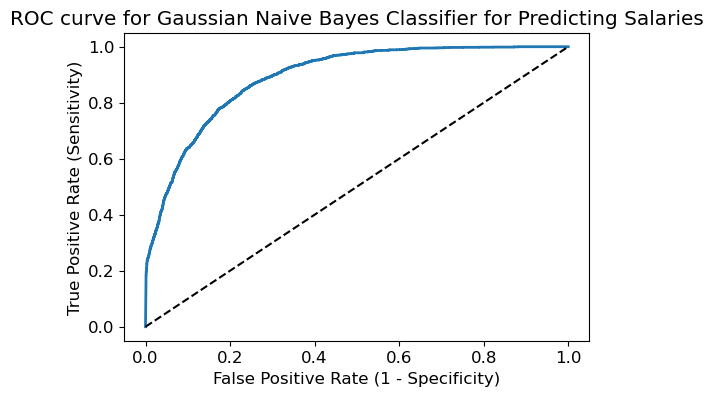

In [88]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='>50K')

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context

## ROC AUC

In [89]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8909


### Cross-validated ROC AUC 

In [90]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8936


## 15. k-Fold Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80701754 0.7877193  0.79947345 0.81439228 0.785871   0.81526986
 0.78894252 0.79420799 0.80122861 0.8056165 ]


In [92]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8000


### Interpretation

Our original model accuracy is 0.8031, but the mean cross-validation accuracy is 0.8000. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.